In [2]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk

In [3]:
ba = pd.read_csv('c:/msda/data230/BusinessAnalyst.csv')
ba['category'] = 'ba'
ba.head()

,Unnamed: 0,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,category
0,0,0,Business Analyst - Clinical & Logistics Platform,$56K-$102K (Glassdoor est.),Company Overview\n\n\nAt Memorial Sloan Ketter...,3.9,Memorial Sloan-Kettering\n3.9,"New York, NY","New York, NY",10000+ employees,1884,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),"Mayo Clinic, The Johns Hopkins Hospital, MD An...",-1,ba
1,1,1,Business Analyst,$56K-$102K (Glassdoor est.),We are seeking for an energetic and collaborat...,3.8,Paine Schwartz Partners\n3.8,"New York, NY","New York, NY",1 to 50 employees,-1,Company - Private,Venture Capital & Private Equity,Finance,Unknown / Non-Applicable,-1,True,ba
2,2,2,Data Analyst,$56K-$102K (Glassdoor est.),"For more than a decade, Asembia has been worki...",3.6,Asembia\n3.6,"Florham Park, NJ","Florham Park, NJ",501 to 1000 employees,2004,Company - Private,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$5 to $10 million (USD),-1,-1,ba
3,3,3,"Information Security Analyst, Incident Response",$56K-$102K (Glassdoor est.),Job Description Summary\nThe Information Secur...,3.6,BD\n3.6,"Franklin Lakes, NJ","Franklin Lakes, NJ",10000+ employees,1897,Company - Public,Health Care Products Manufacturing,Manufacturing,$10+ billion (USD),"Abbott, Siemens, Baxter",-1,ba
4,4,4,Analyst - FP&A Global Revenue,$56K-$102K (Glassdoor est.),Magnite is the world's largest independent sel...,3.4,Rubicon Project\n3.4,"New York, NY","Los Angeles, CA",201 to 500 employees,2007,Company - Public,Internet,Information Technology,$100 to $500 million (USD),"PubMatic, AppNexus, Index Exchange",True,ba


In [4]:
indexs_range = 0 # how many rows are mismacthing
for i in range(len(ba['Unnamed: 0'])):
    if not ba['Unnamed: 0'][i].isdigit():
        indexs_range +=1

dt_fix = ba.iloc[-indexs_range:,:] # sub dataset with the mischating rows
dt_fix.drop(['Competitors','Easy Apply'],axis=1,inplace=True) 
dt_fix.columns = ba.columns[2:] #ignores the first 2 columns names

ba.drop(ba.index[-indexs_range:],axis=0,inplace=True)
ba.drop(['Unnamed: 0','index'],axis=1,inplace=True)
ba = ba.append(dt_fix)

C:\Users\Rui7803\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [5]:
ba.shape

(4092, 16)

In [6]:
da = pd.read_csv('c:/msda/data230/DataAnalyst.csv')
da['category'] = 'da'
da.drop(columns = ['Unnamed: 0'], inplace = True)
da.head()
da.shape

(2253, 16)

In [7]:
de = pd.read_csv('c:/msda/data230/DataEngineer.csv')
de['category'] = 'de'
de.head()
de.shape

(2528, 16)

In [8]:
ds = pd.read_csv('c:/msda/data230/DataScientist.csv')
ds['category'] = 'ds'
ds.drop(columns = ['Unnamed: 0', 'index'], inplace = True)
ds.shape

(3909, 16)

In [9]:
l_job = ['ba', 'da', 'de', 'ds']

In [10]:
frames = [ba, da, de, ds]
jobs = pd.concat(frames ) # or use the key parameter, keys = l_job
jobs = jobs.rename(
    columns={'Job Title': 'Job_Title',
             'Salary Estimate': 'Salary_Estimate',
             'Job Description': 'Job_Description',
             'Company Name': 'Company_Name',
             'Type of ownership': 'Ownership',
             'Easy Apply': 'Easy_Apply'})
jobs.head()

,Job_Title,Salary_Estimate,Job_Description,Rating,Company_Name,Location,Headquarters,Size,Founded,Ownership,Industry,Sector,Revenue,Competitors,Easy_Apply,category
0,Business Analyst - Clinical & Logistics Platform,$56K-$102K (Glassdoor est.),Company Overview\n\n\nAt Memorial Sloan Ketter...,3.9,Memorial Sloan-Kettering\n3.9,"New York, NY","New York, NY",10000+ employees,1884,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),"Mayo Clinic, The Johns Hopkins Hospital, MD An...",-1,ba
1,Business Analyst,$56K-$102K (Glassdoor est.),We are seeking for an energetic and collaborat...,3.8,Paine Schwartz Partners\n3.8,"New York, NY","New York, NY",1 to 50 employees,-1,Company - Private,Venture Capital & Private Equity,Finance,Unknown / Non-Applicable,-1,True,ba
2,Data Analyst,$56K-$102K (Glassdoor est.),"For more than a decade, Asembia has been worki...",3.6,Asembia\n3.6,"Florham Park, NJ","Florham Park, NJ",501 to 1000 employees,2004,Company - Private,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$5 to $10 million (USD),-1,-1,ba
3,"Information Security Analyst, Incident Response",$56K-$102K (Glassdoor est.),Job Description Summary\nThe Information Secur...,3.6,BD\n3.6,"Franklin Lakes, NJ","Franklin Lakes, NJ",10000+ employees,1897,Company - Public,Health Care Products Manufacturing,Manufacturing,$10+ billion (USD),"Abbott, Siemens, Baxter",-1,ba
4,Analyst - FP&A Global Revenue,$56K-$102K (Glassdoor est.),Magnite is the world's largest independent sel...,3.4,Rubicon Project\n3.4,"New York, NY","Los Angeles, CA",201 to 500 employees,2007,Company - Public,Internet,Information Technology,$100 to $500 million (USD),"PubMatic, AppNexus, Index Exchange",True,ba


In [11]:
jobs.shape

(12782, 16)

In [12]:
jobs['Salary_Estimate'].describe()

count                           12782
unique                            447
top       $60K-$109K (Glassdoor est.)
freq                               92
Name: Salary_Estimate, dtype: object

In [13]:
jobs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12782 entries, 0 to 3908
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Job_Title        12782 non-null  object
 1   Salary_Estimate  12782 non-null  object
 2   Job_Description  12782 non-null  object
 3   Rating           12782 non-null  object
 4   Company_Name     12781 non-null  object
 5   Location         12782 non-null  object
 6   Headquarters     12782 non-null  object
 7   Size             12782 non-null  object
 8   Founded          12782 non-null  object
 9   Ownership        12782 non-null  object
 10  Industry         12782 non-null  object
 11  Sector           12782 non-null  object
 12  Revenue          12782 non-null  object
 13  Competitors      12782 non-null  object
 14  Easy_Apply       12782 non-null  object
 15  category         12782 non-null  object
dtypes: object(16)
memory usage: 1.7+ MB


In [14]:
add_col_name = []
add_col = []

In [15]:
def location(loc):
    n = len(loc)
    state = loc[n-2:n]
    city = loc[:n-4]
    return (state, city)

l_state = []
l_city = []
for i in jobs['Location']:
    state, city = location(i)
    l_state.append(state)
    l_city.append(city)
add_col_name.append('State')
add_col.append(l_state)
add_col_name.append('City')
add_col.append(l_city)


In [16]:
def work_experience(job_d):
    match_l = re.findall('(\d{1,2})[-]?\d?\d?[+]? years \w{2,20} experience', job_d)
    if match_l:
        result = int(match_l[0])
    else:
        result = 'NA'
    return result
w_years = []
for i in jobs['Job_Description']:
    w_years.append(work_experience(i))
add_col_name.append('Work_experience')
add_col.append(w_years)

In [17]:
len(w_years)

12782

In [18]:
#for i in jobs['Job_Description']:
#    r_m = re.findall('\d{1,2}[-]?\d?\d?[+]? years \w{2,20} experience',i)
#    print(r_m)

In [19]:
def flag_python(job_d):
    find = re.findall('[Pp]ython', job_d)
    # return (1 if f == 1 else 0)
    if find:
        f = 1
    else:
        f = 0
    return f 

p_req = []
for i in jobs['Job_Description']:
    p_f = flag_python(i)
    p_req.append(p_f)
add_col_name.append('Flag_python')
add_col.append(p_req)

In [20]:
def flag_bachelor(job_d):
    find1 = re.findall('[Bb]achelor', job_d)
    find2 = re.findall('B.?S.?', job_d)
    find3 = re.findall('4 [Yy]ear [Dd]egree', job_d)
    if find1 or find2 or find3:
        b_f = 1
    else:
        b_f = 0
    return b_f

b_req = []
for i in jobs['Job_Description']:
    b_f = flag_bachelor(i)
    b_req.append(b_f)
sum(b_req)/len(b_req)
add_col_name.append('Flag_bachelor')
add_col.append(b_req)

In [21]:
def flag_master(job_d):
    find = re.findall('[Mm]aster', job_d)
    if find:
        f = 1
    else:
        f = 0
    return f

m_req = []
for i in jobs['Job_Description']:
    m_f = flag_master(i)
    m_req.append(m_f)
add_col_name.append('Flag_master')
add_col.append(m_req)
sum(m_req)/len(m_req)

0.21796276013143484

In [22]:
def flag_sql(job_d):
    find = re.findall('[Ss][Qq][Ll]', job_d)
    if find:
        f = 1
    else:
        f = 0
    return f

s_req = []
for i in jobs['Job_Description']:
    s_f = flag_sql(i)
    s_req.append(s_f)
add_col_name.append('Flag_sql')
add_col.append(s_req)
sum(s_req)/len(s_req)

0.4748865592239086

In [23]:
def flag_ml(job_d):
    find = re.findall('[Mm]achine [Ll]earning', job_d)
    if find:
        f = 1
    else:
        f = 0
    return f

ml_req = []
for i in jobs['Job_Description']:
    ml_f = flag_ml(i)
    ml_req.append(ml_f)
add_col_name.append('Flag_ml')
add_col.append(ml_req)
sum(ml_req)/len(ml_req)

0.15873885150993586

In [24]:
def flag_r(job_d):
    find = re.findall(' [/]?[Rr][/,]? ', job_d)
    if find:
        f = 1
    else:
        f = 0
    return f

r_req = []
for i in jobs['Job_Description']:
    r_f = flag_r(i)
    r_req.append(r_f)
add_col_name.append('Flag_r')
add_col.append(r_req)
sum(r_req)/len(r_req)

0.11281489594742607

In [25]:
def flag_v(job_d):
    find = re.findall('[Dd]ata [Vv]isualization', job_d)
    if find:
        f = 1
    else:
        f = 0
    return f

v_req = []
for i in jobs['Job_Description']:
    v_f = flag_v(i)
    v_req.append(v_f)
add_col_name.append('Flag_visualization')
add_col.append(v_req)
sum(v_req)/len(v_req)

0.09779377249256767

In [26]:
def flag_h(job_d):
    find = re.findall('[Hh]adoop', job_d)
    if find:
        f = 1
    else:
        f = 0
    return f

h_req = []
for i in jobs['Job_Description']:
    h_f = flag_h(i)
    h_req.append(h_f)
add_col_name.append('Flag_hadoop')
add_col.append(h_req)
sum(h_req)/len(h_req)

0.11281489594742607

In [27]:
def flag_b(job_d):
    find = re.findall('[Bb]ig [Dd]ata', job_d)
    if find:
        f = 1
    else:
        f = 0
    return f

b_req = []
for i in jobs['Job_Description']:
    b_f = flag_b(i)
    b_req.append(b_f)
add_col_name.append('Flag_big_data')
add_col.append(b_req)
sum(b_req)/len(b_req)

0.13878892192145204

In [28]:
def flag_j(job_d):
    find = re.findall('[Jj]ava', job_d)
    if find:
        f = 1
    else:
        f = 0
    return f

j_req = []
for i in jobs['Job_Description']:
    j_f = flag_j(i)
    j_req.append(j_f)
add_col_name.append('Flag_java')
add_col.append(j_req)
sum(j_req)/len(j_req)

0.1671882334532937

In [29]:
def flag_t(job_d):
    find = re.findall('[Tt]ableau', job_d)
    if find:
        f = 1
    else:
        f = 0
    return f

t_req = []
for i in jobs['Job_Description']:
    t_f = flag_t(i)
    t_req.append(t_f)
add_col_name.append('Flag_tableau')
add_col.append(t_req)
sum(t_req)/len(t_req)

0.15858238147394774

In [30]:
def flag_gis(job_d):
    find = re.findall('[Aa]rc ?[Gg][Ii][Ss]', job_d)
    if find:
        f = 1
    else:
        f = 0
    return f

gis_req = []
for i in jobs['Job_Description']:
    gis_f = flag_gis(i)
    gis_req.append(gis_f)
add_col_name.append('Flag_arc_gis')
add_col.append(gis_req)
sum(gis_req)/len(gis_req)

0.004381161007667032

In [31]:
def flag_nlp(job_d):
    find1 = re.findall('[Nn][Ll][Pp]', job_d)
    find2 = re.findall('[Nn]atural [Ll]anguage [Pp]rocessing', job_d)
    find3 = re.findall('[Nn]euro-? ?[Ll]inguistic [Pp]rogramming', job_d)
    if find1 or find2 or find3:
        f = 1
    else:
        f = 0
    return f

nlp_req = []
for i in jobs['Job_Description']:
    nlp_f = flag_nlp(i)
    nlp_req.append(nlp_f)
add_col_name.append('Flag_nlp')
add_col.append(nlp_req)
sum(nlp_req)/len(nlp_req)

0.03418870286340166

In [32]:
def flag_db(job_d):
    find = re.findall('[Dd]atabase', job_d)
    if find:
        f = 1
    else:
        f = 0
    return f

db_req = []
for i in jobs['Job_Description']:
    db_f = flag_db(i)
    db_req.append(db_f)
add_col_name.append('Flag_database')
add_col.append(db_req)
sum(db_req)/len(db_req)

0.32318885933343766

In [33]:
for i, j in zip(add_col_name, add_col):
    jobs[i] = pd.Series(j)
jobs.shape
# jobs.to_csv('c:\\msda\\data230\\jobs_v1.csv')

(12782, 33)

In [34]:
job_title_str=' '.join([x for x in jobs['Job_Description']])
tokens = nltk.word_tokenize(job_title_str)
tokens=[x.lower() for x in tokens]

In [35]:
from nltk.probability import FreqDist
fdist = FreqDist(tokens)
tops=fdist.most_common(100)

In [13]:
delarr=[]
for key in fdist:
    if len(key)<2:
        delarr.append(key)
for key in delarr:
    del fdist[key]
    
tops=fdist.most_common(100)
print(tops)


[('and', 350742), ('to', 185169), ('the', 152484), ('of', 138091), ('in', 103264), ('data', 93096), ('with', 89476), ('for', 67182), ('experience', 61341), ('or', 55295), ('business', 45043), ('is', 41533), ('as', 37070), ('our', 33477), ('work', 31130), ('you', 31044), ('we', 30776), ('on', 30398), ('will', 27494), ('be', 27040), ('are', 26037), ('that', 24146), ('an', 23548), ('skills', 23525), ('team', 22654), ('years', 18976), ('ability', 18784), ('management', 18495), ('requirements', 18153), ('this', 17660), ('at', 17607), ('development', 17535), ('analysis', 16849), ('by', 16426), ('other', 16295), ('support', 15957), ('all', 15728), ('knowledge', 15665), ('systems', 15419), ('solutions', 14889), ('job', 14672), ('have', 14527), ('from', 14527), ('required', 14491), ('technical', 14445), ('information', 14328), ('working', 13470), ('strong', 13340), ('including', 13218), ('design', 12526), ("'s", 12405), ('new', 12398), ('your', 12299), ('analyst', 11344), ('technology', 11065),

In [36]:
pat_lead=re.compile(r'lead|principal|iii|iv',re.I)
pat_sr=re.compile(r'senior|sr.|sr|ii',re.I)
pat_jr=re.compile(r'junior|jr|jr.|entry|i',re.I)
# from https://www.kaggle.com/andrewhou/data-job-analysis-visualization-using-nlp-rege

In [37]:
def job_title(row):
    if re.match(pat_lead,row['Job_Title']):
        return 'Lead'
    if re.match(pat_sr,row['Job_Title']):
        return 'Senior'
    if re.match(pat_jr,row['Job_Title']):
        return 'Junior'
jobs['Job_Level']=jobs.apply(job_title,axis=1)

In [38]:
J = 0
S = 0
L = 0
for i in jobs['Job_Level']:
    if i == 'Junior':
        J += 1
    elif i == 'Senior':
        S += 1
    elif i == 'Lead':
        L += 1
print(J, S, L)

465 1775 315


In [38]:
pat=re.compile(r'\d+')
sal_df=(jobs['Salary_Estimate'].str.findall(pat)).apply(pd.Series)
sal_df.columns=['sal_low','sal_up']
jobs=pd.concat([jobs,sal_df],axis=1)

In [39]:
jobs = jobs.dropna(subset = ['sal_up'])

In [40]:
jobs['sal_low']=jobs['sal_low'].astype('int')
jobs['sal_up']=jobs['sal_up'].astype('int')
jobs['sal_mean']=(jobs['sal_low']+jobs['sal_up'])/2

In [42]:
# jobs = jobs.dropna(subset = ['State'])

In [41]:
jobs.to_csv('c:\\msda\\data230\\jobs_0911.csv')

In [100]:
jobs.shape

(12781, 37)

In [14]:
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
stops = stopwords.words()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rui7803\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
words = ba['Job Description']
words_ba = ' '.join(words)

In [18]:
words1 = word_tokenize(words_ba)

In [19]:
words2 = [word for word in words1 if not word in stops]

In [20]:
words3 = ' '.join(words2)

In [ ]:
type(words3)

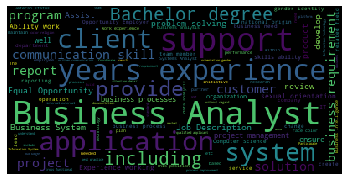

In [21]:
wc = WordCloud().generate(words3)
plt.imshow(wc)
plt.axis('off')
plt.show()

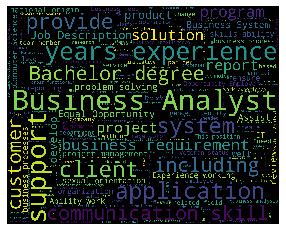

In [24]:
wc = WordCloud().generate(words3)
plt.imshow(wc)
plt.axis('off')
plt.show()

In [58]:
def wcloud(strs, sws):
    words = ' '.join(strs)
    words1 = word_tokenize(words)
    words2 = [word for word in words1 if not word in sws]
    words3 = ' '.join(words2)
    wc = WordCloud().generate(words3)
    plt.imshow(wc)
    plt.axis('off')
    plt.show()

In [59]:
stops.append('job description')


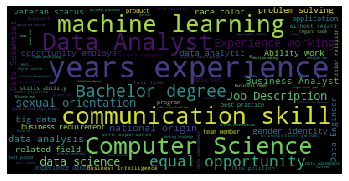

In [60]:
all_jd = jobs['Job_Description']
wcloud(all_jd, stops)